<a href="https://colab.research.google.com/github/Jhonnety/fraud_transactions/blob/master/best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/semestre 10/COIL/Fraud.csv')

In [ ]:
df['type'] = df['type'].astype("category")
df['nameOrig'] = df['nameOrig'].astype("category")
df['nameDest'] = df['nameDest'].astype("category")
df['isFraud'] = df['isFraud'].astype("category")
df['isFlaggedFraud'] = df['isFraud'].astype("category")

In [ ]:
df = df[df['amount'] > 0]

In [ ]:
from sklearn.utils import resample

df_no_fraudulent = df[df['isFraud'] == 0]
df_fraudulent = df[df['isFraud'] == 1]

num_samples_no_fraudulent = 8197

df_no_fraudulent_subsampled = resample(df_no_fraudulent, n_samples=num_samples_no_fraudulent, random_state=42)

df_balanced = pd.concat([df_no_fraudulent_subsampled, df_fraudulent])


In [ ]:
df_balanced = df_balanced.reset_index(drop=True)
df_balanced['isFraud'].value_counts()

0    8197
1    8197
Name: isFraud, dtype: int64

# Normalize data


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16394 entries, 1694553 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   step            16394 non-null  int64   
 1   type            16394 non-null  category
 2   amount          16394 non-null  float64 
 3   nameOrig        16394 non-null  category
 4   oldbalanceOrg   16394 non-null  float64 
 5   newbalanceOrig  16394 non-null  float64 
 6   nameDest        16394 non-null  category
 7   oldbalanceDest  16394 non-null  float64 
 8   newbalanceDest  16394 non-null  float64 
 9   isFraud         16394 non-null  category
 10  isFlaggedFraud  16394 non-null  category
dtypes: category(5), float64(5), int64(1)
memory usage: 263.8 MB


In [ ]:
columns_to_normalize = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
scaler = MinMaxScaler()
df_balanced[columns_to_normalize] = scaler.fit_transform(df_balanced[columns_to_normalize])

In [ ]:
columna_dummies = pd.get_dummies(df_balanced['type'])
df_balanced = pd.concat([df_balanced, columna_dummies], axis=1)

In [ ]:
x = df_balanced[['step', 'CASH_IN', 'CASH_OUT','DEBIT','PAYMENT', 'TRANSFER', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].values
y = df_balanced['isFraud'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return (tp + tn) / N

In [ ]:
historical = {'model':[], 'ac':[]}

In [ ]:
# Regresión logística
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)
y_pred = model.predict(x_test)
historical['model'].append('Regresión logística')
historical['ac'].append(accuracy(y_test, y_pred))

In [ ]:
# Support Vector Machine
model3 = SVC(gamma='auto', kernel='linear')
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
y_pred_train = model3.predict(x_train)
historical['model'].append('Support Vector Machine')
historical['ac'].append(accuracy(y_test, y_pred))

In [ ]:
# KNN
model4 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
y_pred_train = model4.predict(x_train)
historical['model'].append('KNN')
historical['ac'].append(accuracy(y_test, y_pred))

In [ ]:
print(historical)

{'model': ['Regresión logística', 'Support Vector Machine', 'KNN'], 'ac': [0.83, 0.85, 0.93]}


In [ ]:
from sklearn import metrics
lista_test = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del test
lista_train = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del train
porcent_deep = 0
may_deep = 0
for profundidad in range(2, 21):  #Estrutura iterativa para cambiar la profundidad para cambiar la profundidad de 2 a 20
  clf = KNeighborsClassifier(n_neighbors=profundidad, n_jobs=-1) # Instanciamos el modelo
  clf.fit(x_train, y_train) #Entrenamos modelo

  y_pred = clf.predict(x_test)  #Hacemos las predicciones sobre el conjunto de evaluacion
  y_pred2 = clf.predict(x_train)  #Hacemos las predicciones sobre el conjunto de entrenamiento

  ev_model_test = metrics.accuracy_score(y_test,y_pred) #Calculamos la exactitud en el test
  ev_model_train = metrics.accuracy_score(y_train,y_pred2) #Calculamos la exactitud en el train

  if ev_model_test > porcent_deep :
    porcent_deep = ev_model_test
    may_deep = profundidad
  lista_test.append(ev_model_test) #Agregamos los valores a la lista
  lista_train.append(ev_model_train) #Agregamos los valores a la lista


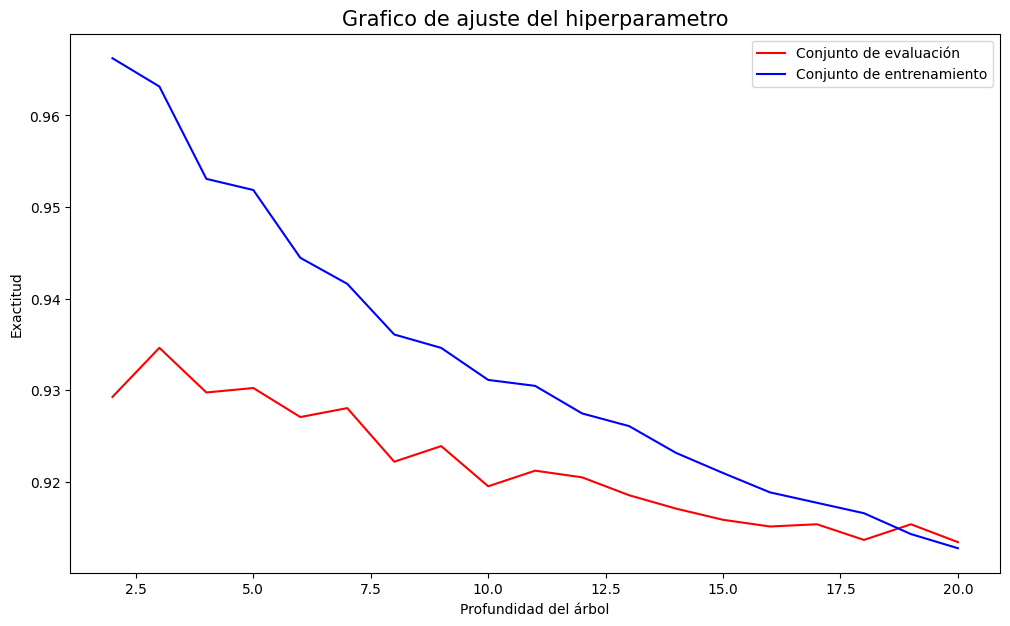

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(range(2,21), lista_test, color="r", label="Conjunto de evaluación") #eje horizontal range(2,21) / eje vertical  lista_test
plt.plot(range(2,21), lista_train, color="b", label="Conjunto de entrenamiento")
plt.title("Grafico de ajuste del hiperparametro", fontsize=15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad del árbol')
plt.show()
#El overfitting no depende de la cantidad de los datos, si no en la complejidad del modelo

In [ ]:
# Random Forest
model5 = RandomForestClassifier(n_estimators=25, max_depth=10)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)
y_pred_train = model5.predict(x_train)
historical['model'].append('Random Forest')
historical['ac'].append(accuracy(y_test, y_pred))

In [ ]:
from sklearn import metrics
lista_test = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del test
lista_train = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del train
porcent_deep = 0
may_deep = 0
for profundidad in range(2, 51):  #Estrutura iterativa para cambiar la profundidad para cambiar la profundidad de 2 a 20
  clf =  RandomForestClassifier(n_estimators=profundidad, max_depth=10) # Instanciamos el modelo
  clf.fit(x_train, y_train) #Entrenamos modelo

  y_pred = clf.predict(x_test)  #Hacemos las predicciones sobre el conjunto de evaluacion
  y_pred2 = clf.predict(x_train)  #Hacemos las predicciones sobre el conjunto de entrenamiento

  ev_model_test = metrics.accuracy_score(y_test,y_pred) #Calculamos la exactitud en el test
  ev_model_train = metrics.accuracy_score(y_train,y_pred2) #Calculamos la exactitud en el train

  if ev_model_test > porcent_deep :
    porcent_deep = ev_model_test
    may_deep = profundidad
  lista_test.append(ev_model_test) #Agregamos los valores a la lista
  lista_train.append(ev_model_train) #Agregamos los valores a la lista


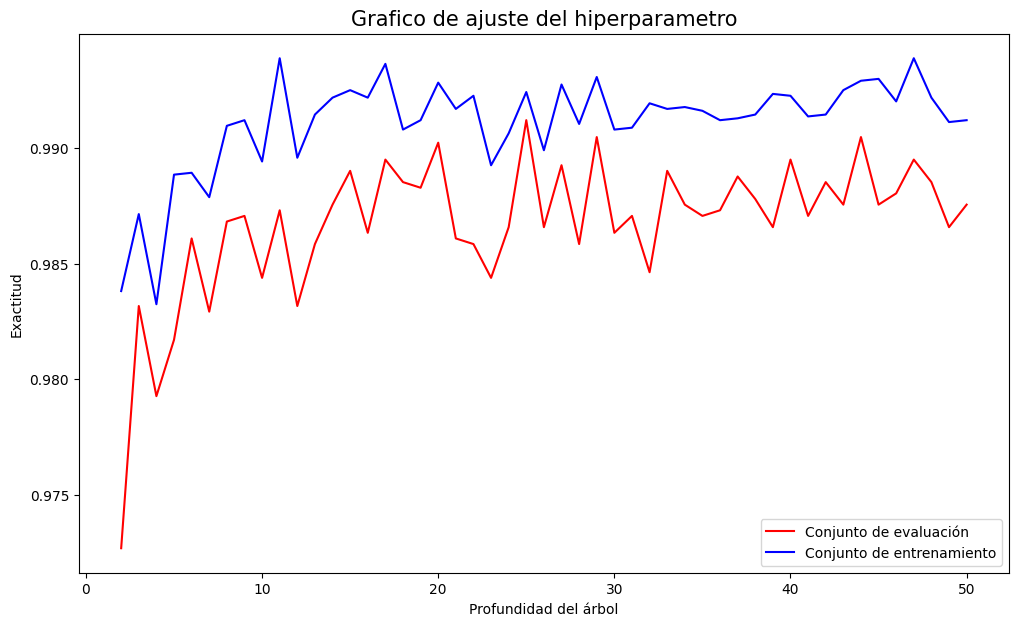

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(range(2,51), lista_test, color="r", label="Conjunto de evaluación") #eje horizontal range(2,51) / eje vertical  lista_test
plt.plot(range(2,51), lista_train, color="b", label="Conjunto de entrenamiento")
plt.title("Grafico de ajuste del hiperparametro", fontsize=15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad del árbol')
plt.show()
#El overfitting no depende de la cantidad de los datos, si no en la complejidad del modelo

In [ ]:
# Árboles de decisión
model6 = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=7)
model6.fit(x_train,y_train)
y_pred = model6.predict(x_test)
y_pred_train = model6.predict(x_train)
historical['model'].append('Árboles de decisión')
historical['ac'].append(accuracy(y_test, y_pred))

0.987313979019273

In [ ]:
from sklearn import metrics
lista_test = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del test
lista_train = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del train
porcent_deep = 0
may_deep = 0
for profundidad in range(2, 21):  #Estrutura iterativa para cambiar la profundidad para cambiar la profundidad de 2 a 20
  clf =  DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=profundidad) # Instanciamos el modelo
  clf.fit(x_train, y_train) #Entrenamos modelo

  y_pred = clf.predict(x_test)  #Hacemos las predicciones sobre el conjunto de evaluacion
  y_pred2 = clf.predict(x_train)  #Hacemos las predicciones sobre el conjunto de entrenamiento

  ev_model_test = metrics.accuracy_score(y_test,y_pred) #Calculamos la exactitud en el test
  ev_model_train = metrics.accuracy_score(y_train,y_pred2) #Calculamos la exactitud en el train

  if ev_model_test > porcent_deep :
    porcent_deep = ev_model_test
    may_deep = profundidad
  lista_test.append(ev_model_test) #Agregamos los valores a la lista
  lista_train.append(ev_model_train) #Agregamos los valores a la lista


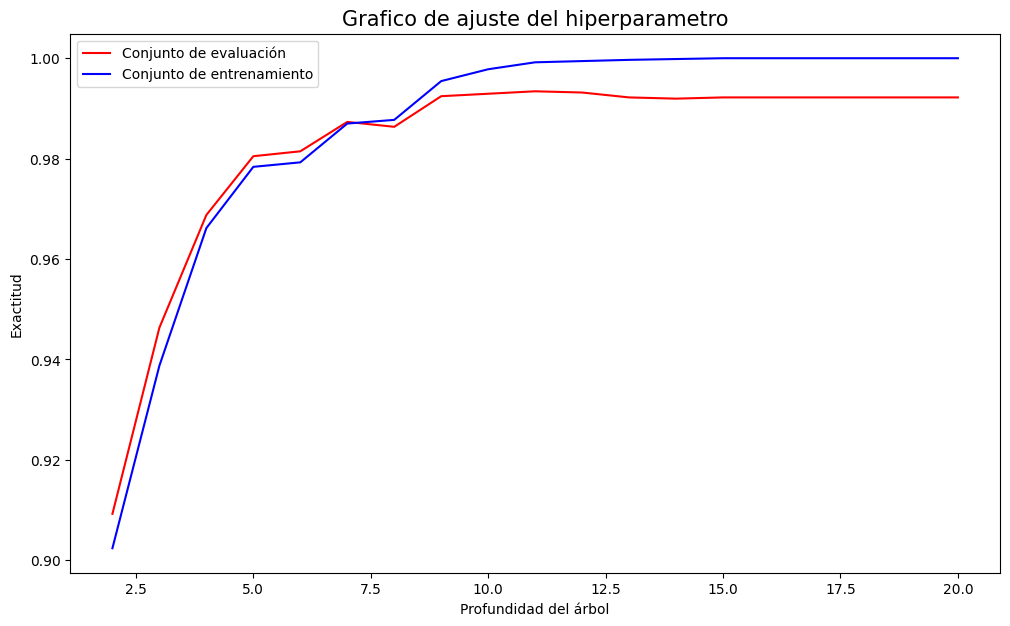

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(range(2,21), lista_test, color="r", label="Conjunto de evaluación") #eje horizontal range(2,21) / eje vertical  lista_test
plt.plot(range(2,21), lista_train, color="b", label="Conjunto de entrenamiento")
plt.title("Grafico de ajuste del hiperparametro", fontsize=15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad del árbol')
plt.show()
#El overfitting no depende de la cantidad de los datos, si no en la complejidad del modelo

In [ ]:
print(historical)

{'model': ['Regresión logística', 'Support Vector Machine', 'KNN', 'Random Forest', 'Árboles de decisión'], 'ac': [0.8312, 0.8495, 0.9346, 0.9861, 0.9861]}


In [ ]:
df = pd.DataFrame(historical)
df.head(10)

,model,ac
0,Regresión logística,0.831178
1,Support Vector Machine,0.849475
2,KNN,0.934618
3,Random Forest,0.988290
4,Árboles de decisión,0.988290


Best model

In [ ]:
# Random Forest
model = RandomForestClassifier(n_estimators=25, max_depth=10)
model.fit(x_train, y_train)
y_pred = model5.predict(x_test)
y_pred_train = model5.predict(x_train)

In [ ]:
print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.9882898267870213
F1 score: 0.9885823025689819
Recall: 0.9928332537028189
Precision: 0.984367598294647


<function matplotlib.pyplot.show(close=None, block=None)>

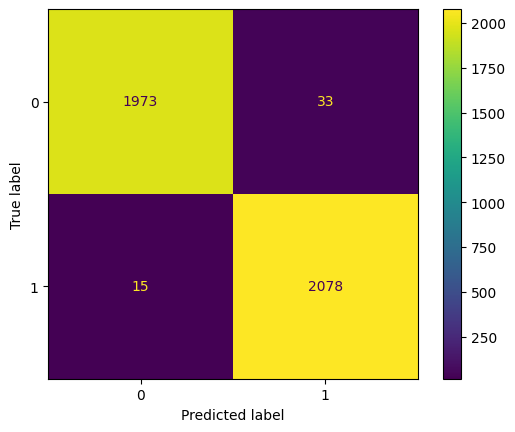

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cm_display.plot()
plt.show

In [ ]:
print(f'verdaderos negativos: {confusion_matrix(y_test, y_pred)[0, 0]}')
print(f'falsos positivos: {confusion_matrix(y_test, y_pred)[0, 1]}')
print(f'falsos negativos: {confusion_matrix(y_test, y_pred)[1, 0]}')
print(f'verdaderos positivos: {confusion_matrix(y_test, y_pred)[1, 1]}')

verdaderos negativos: 1973
falsos positivos: 33
falsos negativos: 15
verdaderos positivos: 2078
